# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl   
import matplotlib.pyplot as plt

In [2]:
# e + 00 없애기
pd.options.display.float_format = '{:.1f}'.format
# 모든 행 출력
pd.set_option('display.max_rows', None)

# 미국 코로나 확진자 수 데이터
# 출처: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36

In [3]:
US_COVID19_Cases = pd.read_csv("/content/drive/MyDrive/DACON/US_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
US_COVID19_Cases = US_COVID19_Cases.sort_values(by=["submission_date"], axis=0)
US_COVID19_Cases = US_COVID19_Cases.dropna(how="any")
US_COVID19_Cases.head(10)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
23651,2020-01-22,AL,33,27.0,6.0,33,6.0,0,0.0,0.0,0,0.0,01/24/2020 12:00:00 AM,Agree,Agree
3962,2020-01-23,AL,34,28.0,6.0,1,0.0,0,0.0,0.0,0,0.0,01/25/2020 12:00:00 AM,Agree,Agree
5502,2020-01-24,AL,34,28.0,6.0,0,0.0,0,0.0,0.0,0,0.0,01/26/2020 12:00:00 AM,Agree,Agree
26587,2020-01-25,AL,37,31.0,6.0,3,0.0,0,0.0,0.0,0,0.0,01/27/2020 12:00:00 AM,Agree,Agree
4136,2020-01-26,AL,37,31.0,6.0,0,0.0,0,0.0,0.0,0,0.0,01/28/2020 12:00:00 AM,Agree,Agree
3336,2020-01-27,AL,38,32.0,6.0,1,0.0,0,0.0,0.0,0,0.0,01/29/2020 12:00:00 AM,Agree,Agree
28488,2020-01-28,AL,39,33.0,6.0,1,0.0,0,0.0,0.0,0,0.0,01/30/2020 12:00:00 AM,Agree,Agree
1549,2020-01-29,AL,40,34.0,6.0,1,0.0,0,0.0,0.0,0,0.0,01/31/2020 12:00:00 AM,Agree,Agree
23713,2020-01-30,AL,42,36.0,6.0,2,0.0,0,0.0,0.0,0,0.0,02/01/2020 12:00:00 AM,Agree,Agree
25618,2020-01-31,AL,44,36.0,8.0,2,2.0,0,0.0,0.0,0,0.0,02/02/2020 12:00:00 AM,Agree,Agree


In [4]:
marker_2020 = US_COVID19_Cases["submission_date"].str.contains("2020-")
marker_2021 = US_COVID19_Cases["submission_date"].str.contains("2021-")
US_COVID19_Cases_2020 = US_COVID19_Cases[marker_2020]
US_COVID19_Cases_2021 = US_COVID19_Cases[marker_2021]

## 전체 데이터 년도별로 분리 저장

In [5]:
# 전체 데이터 년도별로 분리 저장
US_COVID19_Cases_2020.to_csv("/content/drive/MyDrive/DACON/US_COVID19_Cases_2020.csv", encoding='utf-8-sig')
US_COVID19_Cases_2021.to_csv("/content/drive/MyDrive/DACON/US_COVID19_Cases_2021.csv", encoding='utf-8-sig')

## 달별 미국 확진자 수 csv 파일 생성

In [6]:
# 달별 확진자 수 csv 파일 만들기

month = ["January","February","March","April","May","June","July","August","September","October","November","December"]
new_case_2020 = pd.DataFrame(columns=["new_case"], index = month)
new_case_2021 = pd.DataFrame(columns=["new_case"], index = month)
case_2020_idx = []
case_2021_idx = []
for i in range(1, 13):
    if i < 10:
        n = "0"+ str(i)
    else:
        n = str(i)
    case_2020_idx.append(US_COVID19_Cases_2020["submission_date"].str.contains("2020-" + n, na = True))
    case_2021_idx.append(US_COVID19_Cases_2021["submission_date"].str.contains("2021-" + n, na = True))

for i in range(12):
    new_case_2020.loc[month[i]] = [US_COVID19_Cases_2020["new_case"][case_2020_idx[i]].sum()]
    new_case_2021.loc[month[i]] = [US_COVID19_Cases_2021["new_case"][case_2021_idx[i]].sum()]

new_case_2020.to_csv("/content/drive/MyDrive/DACON/US_Newcase_2020.csv", encoding='utf-8-sig')
new_case_2021.to_csv("/content/drive/MyDrive/DACON/US_Newcase_2021.csv", encoding='utf-8-sig')

In [7]:
new_case_2020

,new_case
January,44
February,56
March,85535
April,326327
May,368490
June,356634
July,685529
August,546391
September,553366
October,964013


In [8]:
new_case_2021

,new_case
January,2582607
February,1059251
March,916014
April,949937
May,412944
June,153377
July,249885
August,0
September,0
October,0


## 그래프 그리기

Text(0, 0.5, 'new_case')

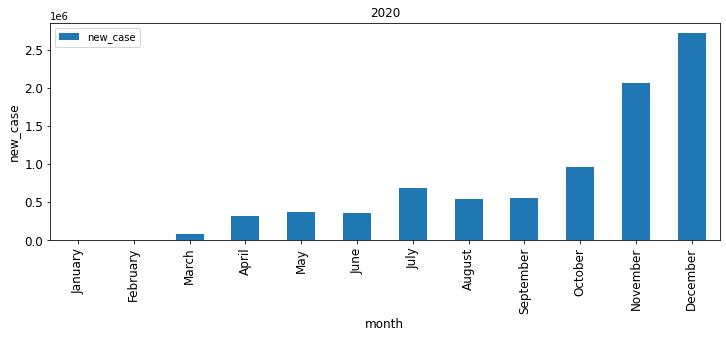

In [9]:
ax = new_case_2020.plot(kind = "bar", title = "2020", figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel("month", fontsize=12)  
ax.set_ylabel("new_case", fontsize=12)

Text(0, 0.5, 'new_case')

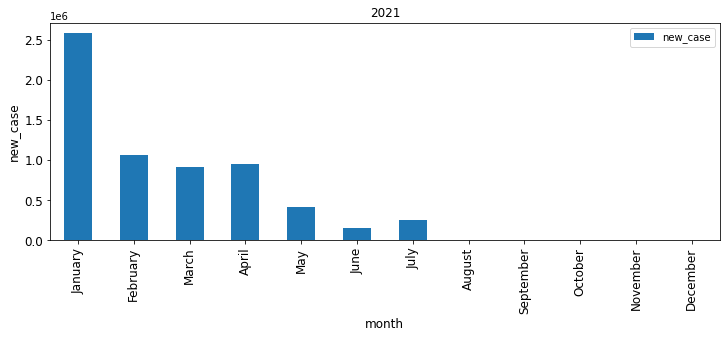

In [10]:
ax = new_case_2021.plot(kind = "bar", title = "2021", figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel("month", fontsize=12)  
ax.set_ylabel("new_case", fontsize=12)

# 미국 달별 백신 접종자 수 데이터

In [11]:
US_Month_Vaccinated = pd.read_csv("/content/drive/MyDrive/DACON/US_vaccinated.csv")
US_Month_Vaccinated.index = ['number_of_vaccinations', 'vaccination_rate']
US_Month_Vaccinated

,Unnamed: 0,2020-12-30,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-30,2021-06-30,2021-07-31
number_of_vaccinations,0,2794588.0,25201143.0,49772180.0,97593290.0,144894586.0,167733972.0,180674739.0,190982149.0
vaccination_rate,1,0.9,7.7,15.2,29.7,44.1,51.1,55.1,58.2


In [12]:
# 행렬 바꾸기 .transpose()
US_Month_Vaccinated = US_Month_Vaccinated.transpose()

In [13]:
US_Month_Vaccinated = US_Month_Vaccinated.drop(US_Month_Vaccinated.index[0])
US_Month_Vaccinated.to_csv("/content/drive/MyDrive/DACON/US_Month_Vaccinated.csv")
US_Month_Vaccinated

,number_of_vaccinations,vaccination_rate
2020-12-30,2794588.0,0.9
2021-01-31,25201143.0,7.7
2021-02-28,49772180.0,15.2
2021-03-31,97593290.0,29.7
2021-04-30,144894586.0,44.1
2021-05-30,167733972.0,51.1
2021-06-30,180674739.0,55.1
2021-07-31,190982149.0,58.2


In [14]:
US_Day_Newcase = pd.read_csv("/content/drive/MyDrive/DACON/US_Day_Newcase.csv")
US_Day_Newcase.head(10)

,submission_date,new_case
0,2020-12-20,65418
1,2020-12-21,70458
2,2020-12-22,92159
3,2020-12-23,91294
4,2020-12-24,59310
5,2020-12-25,55322
6,2020-12-26,83159
7,2020-12-27,51447
8,2020-12-28,81772
9,2020-12-29,94464


In [15]:
print(len(US_Day_Newcase["submission_date"]))

218


In [16]:
US_Day_Vaccinated = pd.read_csv("/content/drive/MyDrive/DACON/US_Vaccinated.csv")
US_Day_Vaccinated.head(10)

,date,people_vaccinated
0,2020-12-20,556208.0
1,2020-12-21,614117.0
2,2020-12-23,1008025.0
3,2020-12-26,1944585.0
4,2020-12-28,2127143.0
5,2020-12-30,2794588.0
6,2021-01-02,4225756.0
7,2021-01-04,4563260.0
8,2021-01-05,4836469.0
9,2021-01-06,5306797.0


In [17]:
US_Day_Data = pd.DataFrame( columns = ["date", "new_case", "people_vaccinated"])
US_Day_Data 

,date,new_case,people_vaccinated


In [18]:
k = 0
for i, value in enumerate(US_Day_Vaccinated['date']):
    if value in list(US_Day_Vaccinated['date']):
        temp = list(US_Day_Vaccinated['date'])
        idx = temp.index(value)
        US_Day_Data.loc[k] = [value, US_Day_Newcase["new_case"][i], US_Day_Vaccinated['people_vaccinated'][idx]]
        k += 1

In [19]:
US_Day_Data.head(10)

,date,new_case,people_vaccinated
0,2020-12-20,65418,556208.0
1,2020-12-21,70458,614117.0
2,2020-12-23,92159,1008025.0
3,2020-12-26,91294,1944585.0
4,2020-12-28,59310,2127143.0
5,2020-12-30,55322,2794588.0
6,2021-01-02,83159,4225756.0
7,2021-01-04,51447,4563260.0
8,2021-01-05,81772,4836469.0
9,2021-01-06,94464,5306797.0


In [20]:
US_Day_Data.to_csv("/content/drive/MyDrive/DACON/US_Day_Data.csv", index = False)